# Decision Tree


In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse


In [229]:
def load_train_data():
    train_file = 'train.json.zip'
    train = pd.read_json(train_file, orient='records', convert_dates=['created'])
    train.reset_index(drop=True, inplace=True)
    return train

def load_test_data():
    test_file = 'test.json.zip'
    test = pd.read_json(test_file, orient='records', convert_dates=['created'])
    test.reset_index(drop=True, inplace=True)
    return test

t = load_train_data()

# t = pd.read_json('train.json')

In [230]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [231]:
testing = load_test_data()
# testing = pd.read_json('test.json')

In [232]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
3,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
4,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


### Remove outliers

In [233]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [234]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [235]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [236]:
def outputCSV(predLabel):
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission.csv", index=False)

### Features selection

#### 0.Naive features

In [237]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']

In [238]:
X_pred = testing[featureSelect]

In [239]:
X = t[featureSelect]

In [240]:
y = t['interest_level']

In [241]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [242]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [243]:
scores.mean()

-0.7018399017813007

In [244]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [245]:
treeModel.score(X,y)

0.7065614653652663

In [246]:
predLable = treeModel.predict_proba(X_pred)

In [247]:
outputCSV(predLable)

logloss: 0.71082 (depth = 5)



#### 1.Tune parameters

In [248]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

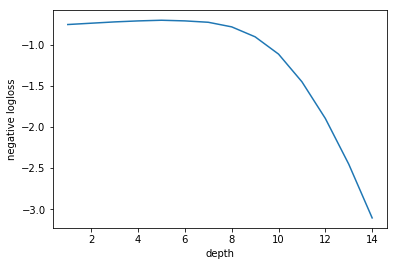

In [249]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [250]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 5


#### 2.More features

In [251]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

In [252]:
date = np.vectorize(date_to_month)

In [253]:
t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

In [254]:
t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

In [255]:
featureSelect = featureSelect + ['year','month','day','hour','minute']

In [256]:
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

In [257]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

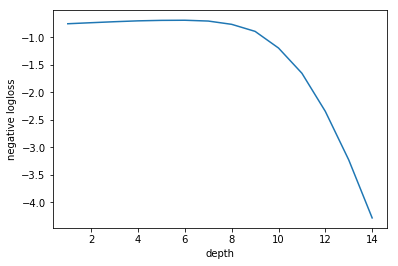

In [258]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [259]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,15):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 6


In [260]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [261]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [262]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [263]:
treeModel.score(X,y)

0.7100227888377693

In [264]:
predLable = treeModel.predict_proba(X_pred)

In [265]:
outputCSV(predLable)

logloss:0.70834(depth = 5) 0.71338(depth = 4) 0.71477 (depth = 6) 0.73024 (depth = 7) 1.33995(depth = 10)

#### 3.Add categorical features

In [266]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list]).encode('utf-8')

In [267]:
list2str = np.vectorize(list2str)

In [268]:
t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

In [269]:
tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

In [270]:
k_range = range(1,9)
cv_scores = []
for n in k_range:
    tree =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())

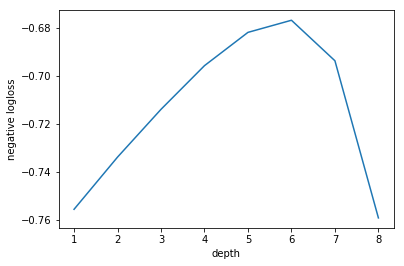

In [271]:
plt.plot(k_range,cv_scores)
plt.xlabel('depth')
plt.ylabel('negative logloss')
plt.show()

In [272]:
bestScore = max(cv_scores)
bestIndex = -1
for index in range(1,9):
    if cv_scores[index - 1] == bestScore:
        bestIndex = index
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 6


In [273]:
treeModel = DecisionTreeClassifier(max_depth = 6)

In [274]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [275]:
treeModel.score(X,y)

0.7155695059551963

In [276]:
predLable = treeModel.predict_proba(X_pred)

In [277]:
outputCSV(predLable)

从这开始，把之前的model再跑一把就行

logloss: 0.69182(d = 5) 0.68476(d=6)